In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Create synthetic students data
students = pd.DataFrame({
    'interaction_time': np.random.randint(50, 300, 100),
    'profile_completion': np.random.uniform(20, 100, 100),
    'messages_sent': np.random.randint(0, 20, 100),
    'alumni_replies': np.random.randint(0, 10, 100),
    'referrals_given': np.random.randint(0, 5, 100),
    'user_type': 'student'
})

# Create synthetic alumni data
alumni = pd.DataFrame({
    'interaction_time': np.random.randint(50, 300, 100),
    'profile_completion': np.random.uniform(20, 100, 100),
    'messages_sent': np.random.randint(0, 10, 100),
    'alumni_replies': np.random.randint(0, 20, 100),
    'referrals_given': np.random.randint(0, 10, 100),
    'user_type': 'alumni'
})

# Combine both
df = pd.concat([students, alumni], ignore_index=True)


In [ ]:
features = ['interaction_time', 'profile_completion', 'messages_sent', 'alumni_replies', 'referrals_given']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])


In [ ]:
# Choose number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)


In [ ]:
def assign_student_segment(row):
    if row['messages_sent'] >= 15 and row['profile_completion'] >= 70:
        return 'Power Seeker'
    elif row['messages_sent'] >= 10 and row['alumni_replies'] >= 5:
        return 'Super Engager'
    elif row['alumni_replies'] == 0 and row['messages_sent'] > 0:
        return 'Ghosted Student'
    elif row['referrals_given'] > 0:
        return 'Referral Hunter'
    elif row['messages_sent'] < 3 and row['profile_completion'] < 50:
        return 'Silent Student'
    else:
        return 'Explorer'

def assign_alumni_segment(row):
    if row['alumni_replies'] >= 10 and row['referrals_given'] >= 5:
        return 'Super Alumni'
    elif row['alumni_replies'] >= 5:
        return 'Active Alumni'
    elif row['referrals_given'] >= 1:
        return 'One-Time Referrer'
    elif row['alumni_replies'] == 0:
        return 'Inactive Alumni'
    else:
        return 'Supportive Watcher'

def assign_segment(row):
    if row['user_type'] == 'student':
        return assign_student_segment(row)
    elif row['user_type'] == 'alumni':
        return assign_alumni_segment(row)
    else:
        return 'Unknown'


In [ ]:
df['SegmentName'] = df.apply(assign_segment, axis=1)


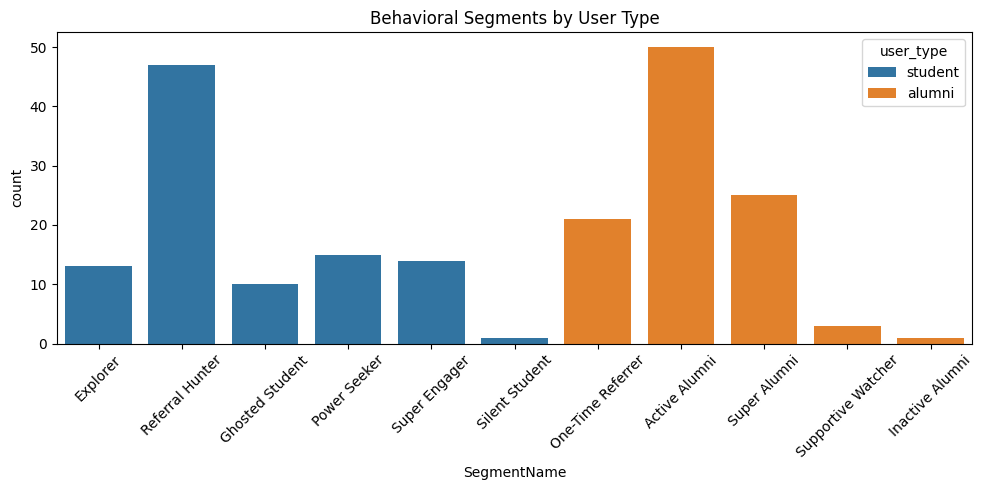

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='SegmentName', hue='user_type')
plt.xticks(rotation=45)
plt.title('Behavioral Segments by User Type')
plt.tight_layout()
plt.show()


In [ ]:
new_users = pd.DataFrame([
    # A student who is active
    {'interaction_time': 150, 'profile_completion': 85, 'messages_sent': 16, 'alumni_replies': 5, 'referrals_given': 1, 'user_type': 'student'},

    # A ghost student
    {'interaction_time': 80, 'profile_completion': 40, 'messages_sent': 3, 'alumni_replies': 0, 'referrals_given': 0, 'user_type': 'student'},

    # A super alumni
    {'interaction_time': 180, 'profile_completion': 90, 'messages_sent': 2, 'alumni_replies': 15, 'referrals_given': 6, 'user_type': 'alumni'},

    # An inactive alumni
    {'interaction_time': 60, 'profile_completion': 60, 'messages_sent': 0, 'alumni_replies': 0, 'referrals_given': 0, 'user_type': 'alumni'}
])


In [ ]:
features = ['interaction_time', 'profile_completion', 'messages_sent', 'alumni_replies', 'referrals_given']
scaled_new = scaler.transform(new_users[features])
new_users['Segment'] = kmeans.predict(scaled_new)


In [ ]:
new_users['SegmentName'] = new_users.apply(assign_segment, axis=1)


In [ ]:
print(new_users[['user_type', 'Segment', 'SegmentName']])


  user_type  Segment      SegmentName
0   student        0     Power Seeker
1   student        2  Ghosted Student
2    alumni        3     Super Alumni
3    alumni        1  Inactive Alumni


In [ ]:
import joblib

joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']